<a href="https://colab.research.google.com/github/hobiecatlob/hello-world2/blob/main/ICM_Build_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Udemy Career 365 Python for Finance Course

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm;

import pandas_datareader.data as web
from datetime import datetime
import datetime
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()

for t in tickers:
  mydata[t] = web.DataReader(t, 'yahoo', start = '2007-01-01')['Adj Close']
  
mydata

,PG,MSFT,F,GE
Date,,,,
2007-01-03,42.380424,22.012707,5.090837,23.687462
2007-01-04,42.058666,21.975842,5.219631,23.550217
2007-01-05,41.697510,21.850521,5.165400,23.431679
2007-01-08,41.789440,22.064304,5.239967,23.425455
2007-01-09,41.684357,22.086433,5.280640,23.425455
...,...,...,...,...
2021-02-09,128.669998,243.770004,11.930000,11.540000
2021-02-10,128.220001,242.820007,11.760000,11.400000
2021-02-11,128.330002,244.490005,11.450000,11.460000


In [ ]:
mydata.pct_change()

,PG,MSFT,F,GE
Date,,,,
2007-01-03,NaN,NaN,NaN,NaN
2007-01-04,-0.007592,-0.001675,0.025299,-0.005794
2007-01-05,-0.008587,-0.005703,-0.010390,-0.005033
2007-01-08,0.002205,0.009784,0.014436,-0.000266
2007-01-09,-0.002515,0.001003,0.007762,0.000000
...,...,...,...,...
2021-02-09,-0.003871,0.005362,0.032007,-0.006029
2021-02-10,-0.003497,-0.003897,-0.014250,-0.012132
2021-02-11,0.000858,0.006878,-0.026361,0.005263


## Correlation Matrix

In [ ]:
#mydata['PG_Daily'] = new_data['PG'].pct_change()  #MyTest:  Daily Returns for PG

In [ ]:
mydata

,PG,MSFT,F,GE
Date,,,,
2007-01-03,42.636059,22.012707,5.068240,23.318228
2007-01-04,42.312363,21.975842,5.196465,23.183111
2007-01-05,41.949009,21.850521,5.142475,23.066423
2007-01-08,42.041492,22.064304,5.216712,23.060289
2007-01-09,41.935799,22.086433,5.257203,23.060289
...,...,...,...,...
2020-12-24,137.720001,222.750000,8.860000,10.650000
2020-12-28,138.679993,224.960007,8.890000,10.640000
2020-12-29,138.419998,224.149994,8.820000,10.560000


In [ ]:
#Note, as this DF contains only prices this will give you the corr of their prices, NOT returns
mydata.corr()

,PG,MSFT,F,GE
PG,1.000000,0.946173,0.308354,-0.204540
MSFT,0.946173,1.000000,0.106025,-0.392114
F,0.308354,0.106025,1.000000,0.364024
GE,-0.204540,-0.392114,0.364024,1.000000


In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3525 entries, 2007-01-03 to 2020-12-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      3525 non-null   float64
 1   MSFT    3525 non-null   float64
 2   F       3525 non-null   float64
 3   GE      3525 non-null   float64
dtypes: float64(4)
memory usage: 137.7 KB


# Normalize to 100

Pt / P0 * 100
The P0 means first price.  To get
this we have to iloc[0].  Now all subsequent
day's price is compared back to it.

In [ ]:
mydata.iloc[0]

PG      42.636059
MSFT    22.012707
F        5.068240
GE      23.318228
Name: 2007-01-03 00:00:00, dtype: float64

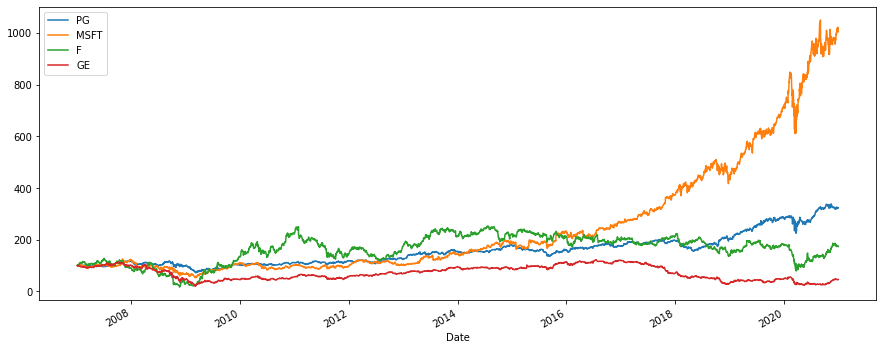

In [ ]:
(mydata/ mydata.iloc[0] * 100).plot(figsize=(15,6)) ;


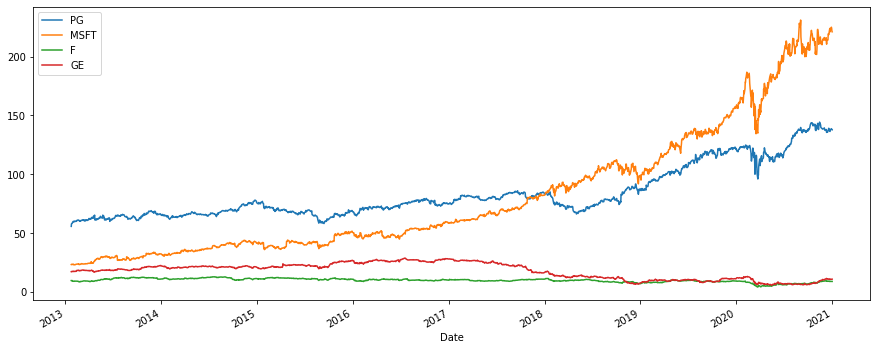

In [ ]:
mydata[-2000:].plot(figsize=(15,6)) ;  #This is 'unnormalized'.  And I sliced to get that last 2000 data points.

# Calculating Returns

In [ ]:
returns = (mydata/mydata.shift(1)) - 1
#returns = mydata.pct_change()  I prefer this way  SAME THING
returns

,PG,MSFT,F,GE
Date,,,,
2007-01-03,NaN,NaN,NaN,NaN
2007-01-04,-0.007592,-0.001675,0.025300,-0.005794
2007-01-05,-0.008587,-0.005703,-0.010390,-0.005033
2007-01-08,0.002205,0.009784,0.014436,-0.000266
2007-01-09,-0.002514,0.001003,0.007762,0.000000
...,...,...,...,...
2020-12-24,0.010122,0.007827,-0.014461,-0.019337
2020-12-28,0.006971,0.009921,0.003386,-0.000939
2020-12-29,-0.001875,-0.003601,-0.007874,-0.007519


In [ ]:
returns.corr()

,PG,MSFT,F,GE
PG,1.000000,0.483121,0.308434,0.399932
MSFT,0.483121,1.000000,0.396003,0.416051
F,0.308434,0.396003,1.000000,0.471530
GE,0.399932,0.416051,0.471530,1.000000


In [ ]:
weights = np.array([0.25,0.25,0.25,0.25])

In [ ]:
#Learn about the numpy dot method.
np.dot(returns, weights)

array([        nan,  0.00255961, -0.00742828, ..., -0.00521709,
        0.00075611, -0.00066561])

In [ ]:
#Avergae annual return for each stock, I think?
annual_returns = returns.mean() * 250
annual_returns

PG      0.100824
MSFT    0.203849
F       0.132409
GE      0.007396
dtype: float64

In [ ]:
np.dot(annual_returns, weights)

0.11111958450775816

In [ ]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

11.112 %


In [ ]:


pfolio_2 = str(round(np.dot(annual_returns, weights2), 5) * 100) + ' %'
print (pfolio_1)
print (pfolio_2)


11.112 %
14.21 %


# Calc Rets for Indices
Lesson #69 Udemy Career 365 Python for Finance Course

In [ ]:
tickers = ['^GSPC', '^IXIC', '^GDAXI', '^GSPTSE']
ind_data = pd.DataFrame()

for t in tickers:
  ind_data[t] = web.DataReader(t, 'yahoo', start = '1997-1-1')['Adj Close']

In [ ]:
ind_data.corr()

,^GSPC,^IXIC,^GDAXI,^GSPTSE
^GSPC,1.000000,0.983090,0.946153,0.818335
^IXIC,0.983090,1.000000,0.909961,0.769199
^GDAXI,0.946153,0.909961,1.000000,0.888826
^GSPTSE,0.818335,0.769199,0.888826,1.000000


In [ ]:
ind_data.dropna()

,^GSPC,^IXIC,^GDAXI,^GSPTSE
Date,,,,
1997-01-02,737.010010,1280.699951,2820.810059,5904.299805
1997-01-03,748.030029,1310.680054,2863.260010,5919.500000
1997-01-06,747.650024,1316.400024,2890.199951,5920.700195
1997-01-07,753.229980,1327.729980,2876.340088,5946.899902
1997-01-08,748.409973,1320.349976,2904.080078,5930.000000
...,...,...,...,...
2020-12-21,3694.919922,12742.519531,13246.299805,17500.900391
2020-12-22,3687.260010,12807.919922,13418.110352,17552.500000
2020-12-23,3690.010010,12771.110352,13587.230469,17593.599609


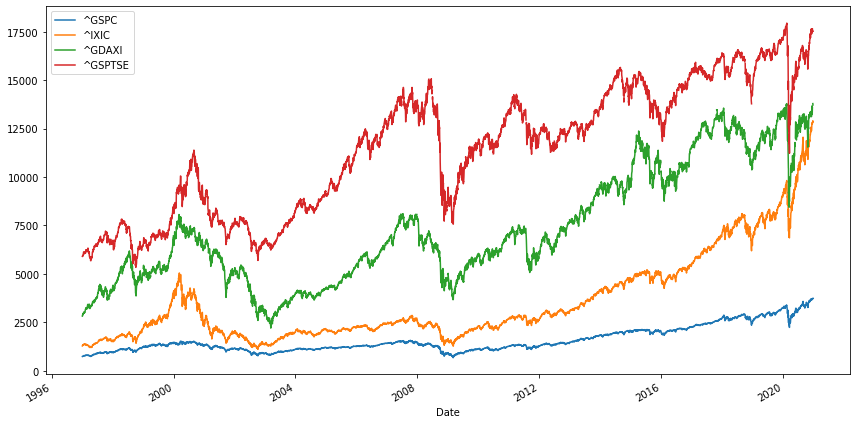

In [ ]:
ind_data[['^GSPC', '^IXIC', '^GDAXI', '^GSPTSE']].plot(figsize = (12,6))
plt.tight_layout()

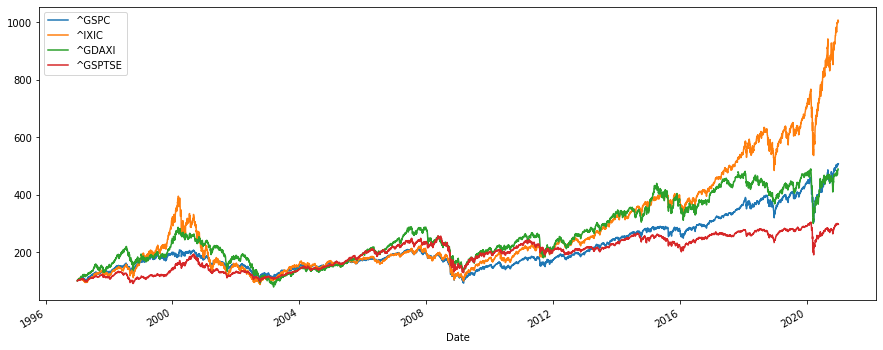

In [ ]:
# Set to normalize

(ind_data/ ind_data.iloc[0] * 100).plot(figsize=(15,6)) ;

In [ ]:
#Calc Returns
returns = (ind_data/ind_data.shift(1)) - 1
#returns = ind_data.pct_change()  I prefer this way  SAME THING
returns

,^GSPC,^IXIC,^GDAXI,^GSPTSE
Date,,,,
1997-01-02,NaN,NaN,NaN,NaN
1997-01-03,0.014952,0.023409,0.015049,0.002574
1997-01-06,-0.000508,0.004364,0.009409,0.000203
1997-01-07,0.007463,0.008607,-0.004795,0.004425
1997-01-08,-0.006399,-0.005558,0.009644,-0.002842
...,...,...,...,...
2020-12-24,0.003537,0.002633,NaN,0.001722
2020-12-28,0.008723,0.007395,NaN,NaN
2020-12-29,-0.002227,-0.003814,-0.002096,NaN


In [ ]:
returns.corr()

,^GSPC,^IXIC,^GDAXI,^GSPTSE
^GSPC,1.000000,0.891681,0.599783,0.767466
^IXIC,0.891681,1.000000,0.546491,0.710706
^GDAXI,0.599783,0.546491,1.000000,0.554607
^GSPTSE,0.767466,0.710706,0.554607,1.000000


In [ ]:
weights = np.array([0.25,0.25,0.25,0.25])

annual_returns = returns.mean() * 250
annual_returns


^GSPC      0.086584
^IXIC      0.127241
^GDAXI     0.078552
^GSPTSE    0.049903
dtype: float64

In [ ]:

np.dot(annual_returns, weights)

0.0855699198698894

In [ ]:
annual_returns.mean()

0.0855699198698894

In [ ]:
annual_returns.std()

0.031931679076655714

In [ ]:
annual_returns.std() ** 0.5

0.17869437337715957

In [ ]:
annual_returns.corr()

TypeError: ignored